# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly


In [2]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [50]:
df_hh_income = pd.read_csv('data/Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('data/Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('data/Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('data/Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('data/Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration
## Data Cleaning - Check for Missing Values and Duplicates

In [51]:
df_hh_income = df_hh_income.fillna(0)
df_fatalities.race = df_fatalities.race.fillna(0)
df_fatalities.armed = df_fatalities.armed.fillna(0)
df_fatalities.age = df_fatalities.age.fillna(0)
df_hh_income = df_hh_income.drop_duplicates(subset=['City'], keep='last')
df_pct_poverty = df_pct_poverty.drop_duplicates(subset=['City'], keep='last')
df_pct_completed_hs = df_pct_completed_hs.drop_duplicates(subset=['City'], keep='last')
df_share_race_city = df_share_race_city.drop_duplicates(subset=['City'], keep='last')
df_pct_poverty.rename(index={1:"Geographic_Area"}, inplace = True)
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.str.replace("-", '0')
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype(float)
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.str.replace("-", "0")
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.astype(float)
df_share_race_city.share_white = df_share_race_city.share_white.replace("(X)", '0')
df_share_race_city.share_white = df_share_race_city.share_white.astype(float)
df_share_race_city.share_black = df_share_race_city.share_black.replace("(X)", '0')
df_share_race_city.share_black = df_share_race_city.share_black.astype(float)
df_share_race_city.share_hispanic = df_share_race_city.share_hispanic.replace("(X)", '0')
df_share_race_city.share_hispanic = df_share_race_city.share_hispanic.astype(float)
df_share_race_city.share_asian = df_share_race_city.share_asian.replace("(X)", '0')
df_share_race_city.share_asian = df_share_race_city.share_asian.astype(float)
df_share_race_city.share_native_american = df_share_race_city.share_native_american.replace("(X)", '0')
df_share_race_city.share_native_american = df_share_race_city.share_native_american.astype(float)
df_fatalities.race = df_fatalities.race.replace("O", "Undefined")
df_fatalities.race = df_fatalities.race.replace(0, "Undefined")
df_fatalities.date= pd.to_datetime(df_fatalities.date)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [5]:
state_out = []
pvr_rate = []
for state in df_pct_poverty.iloc[:, 0].unique():
    state_out.append(state)
    data=df_pct_poverty.poverty_rate[df_pct_poverty.iloc[:, 0] == state]
    pvr_rate.append(data.sum()/len(data))

povr_data = {"state":state_out, "poverty":pvr_rate}
df_powr = pd.DataFrame(data=povr_data)
df_powr = df_powr.sort_values(by=["poverty"])


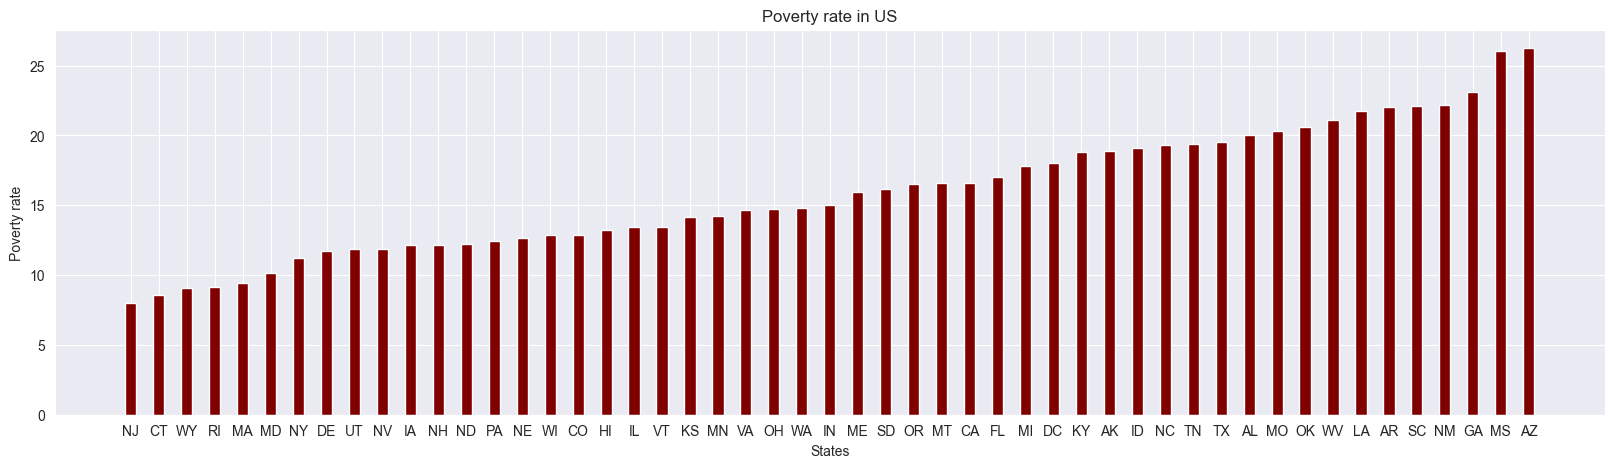

In [30]:
fig = plt.figure(figsize = (20, 5))

# creating the bar plot
plt.bar(df_powr.state, df_powr.poverty, color ='maroon',
        width = 0.4)

plt.xlabel("States")
plt.ylabel("Poverty rate")
plt.title("Poverty rate in US")
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

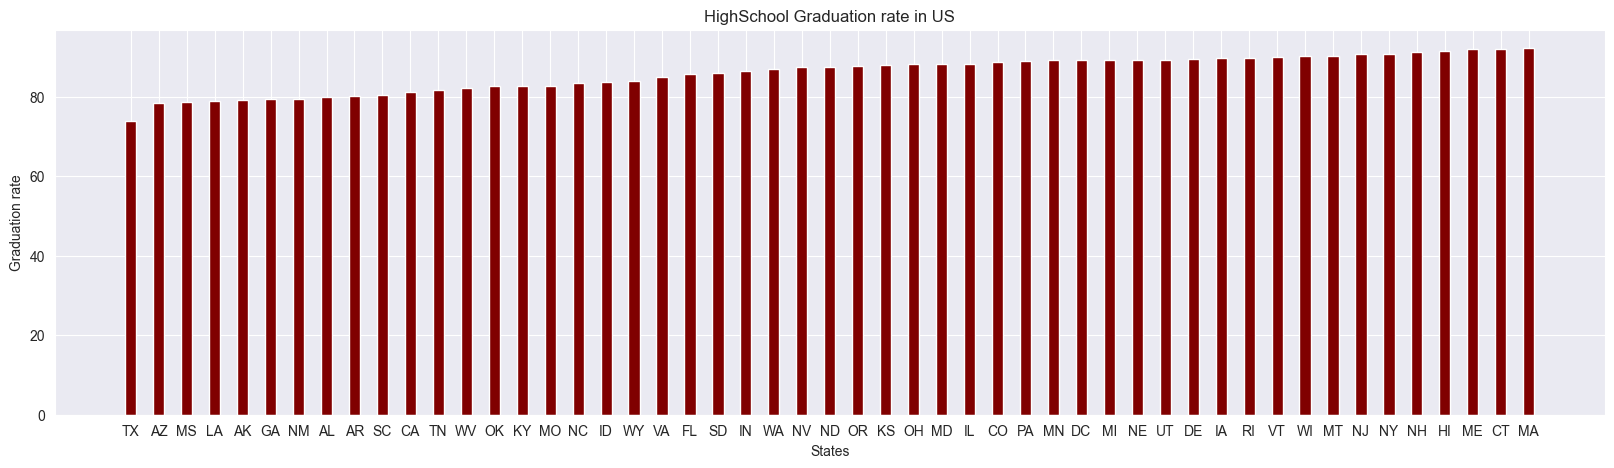

In [29]:
grad_ou = []
grad_state = []
for state in df_pct_completed_hs.iloc[:, 0].unique():
    grad_data = df_pct_completed_hs.percent_completed_hs[df_pct_completed_hs.iloc[:, 0] == state]
    grad_state.append(state)
    grad_ou.append(grad_data.sum()/len(grad_data))

dxd = {'state': grad_state, 'grad_rate': grad_ou}
df_grad = pd.DataFrame(data=dxd)
df_grad = df_grad.sort_values(by=["grad_rate"])
fig = plt.figure(figsize = (20, 5))

# creating the bar plot
plt.bar(df_grad.state, df_grad.grad_rate, color ='maroon',
        width = 0.4)

plt.xlabel("States")
plt.ylabel("Graduation rate")
plt.title("HighSchool Graduation rate in US")
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

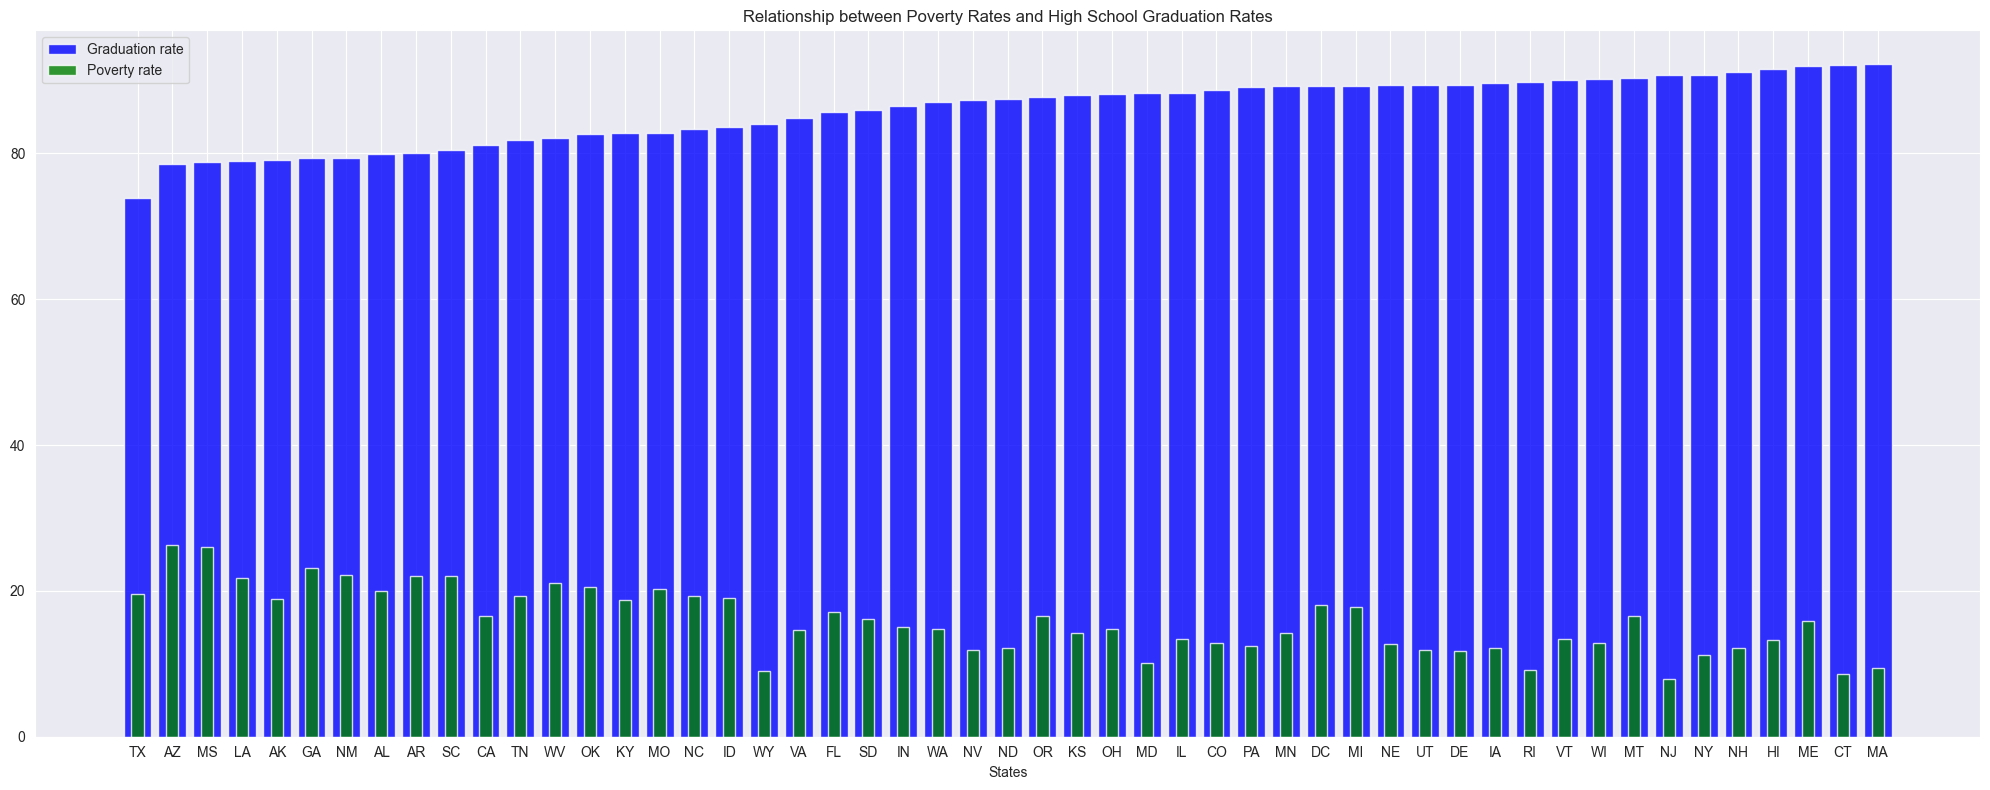

In [28]:
figure, ax = plt.subplots(figsize = (20, 8))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(df_grad.state, df_grad.grad_rate,
                 alpha=opacity,
                 color='b',
                 label='Graduation rate')

rects2 = plt.bar(df_powr.state, df_powr.poverty, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Poverty rate')

plt.xlabel('States')
plt.ylabel('')
plt.title('Relationship between Poverty Rates and High School Graduation Rates')

plt.legend()

plt.tight_layout()
plt.show()

#### scatter plot to visualise the same relationship

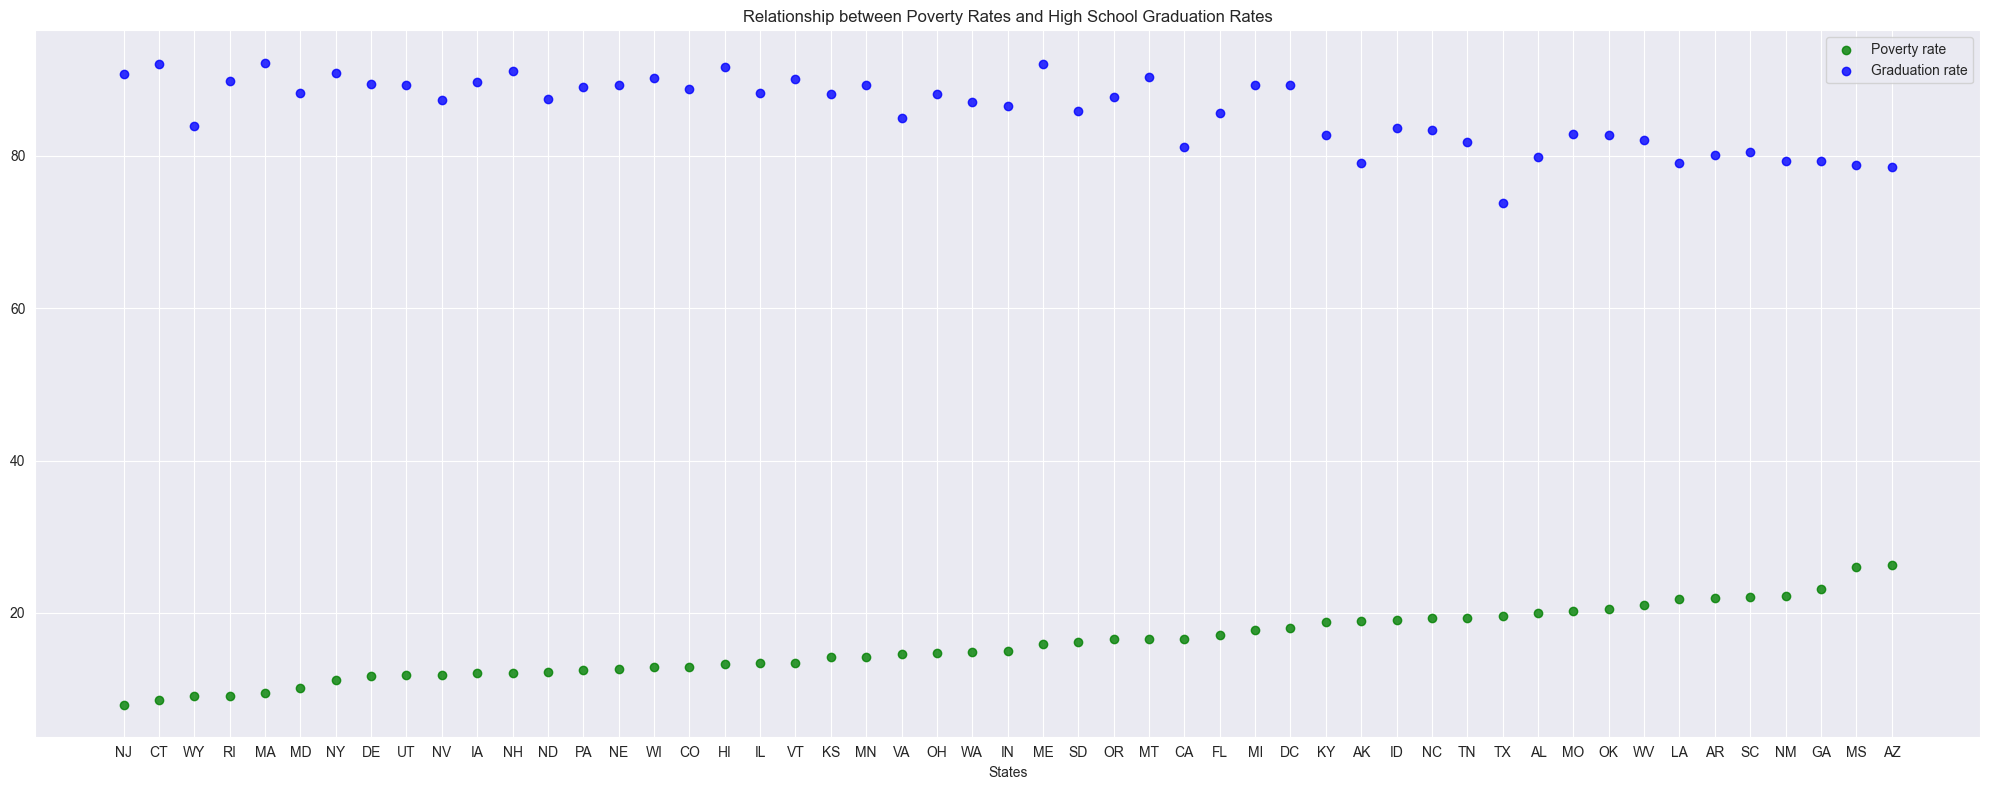

In [27]:
figure1, axe = plt.subplots(figsize = (20, 8))
opacity = 0.8

scater2 = plt.scatter(df_powr.state, df_powr.poverty,
                      alpha=opacity,
                      color='g',
                      label='Poverty rate')
scater1 = plt.scatter(df_grad.state, df_grad.grad_rate,
                 alpha=opacity,
                 color='b',
                 label='Graduation rate')



plt.xlabel('States')
plt.ylabel('')
plt.title('Relationship between Poverty Rates and High School Graduation Rates')

plt.legend()

plt.tight_layout()
plt.show()

In [10]:
pop_state = []
wh_share = []
bl_share = []
na_share = []
as_share = []
hi_share = []
for state in df_share_race_city.iloc[:, 0].unique():
    wh_share.append(df_share_race_city.share_white[df_share_race_city.iloc[:, 0] == state].sum()/len(df_share_race_city.share_white[df_share_race_city.iloc[:, 0] == state]))
    bl_share.append(df_share_race_city.share_black[df_share_race_city.iloc[:, 0] == state].sum()/len(df_share_race_city.share_black[df_share_race_city.iloc[:, 0] == state]))
    na_share.append(df_share_race_city.share_native_american[df_share_race_city.iloc[:, 0] == state].sum()/len(df_share_race_city.share_native_american[df_share_race_city.iloc[:, 0] == state]))
    as_share.append(df_share_race_city.share_asian[df_share_race_city.iloc[:, 0] == state].sum()/len(df_share_race_city.share_asian[df_share_race_city.iloc[:, 0] == state]))
    hi_share.append(df_share_race_city.share_hispanic[df_share_race_city.iloc[:, 0] == state].sum()/len(df_share_race_city.share_hispanic[df_share_race_city.iloc[:, 0] == state]))
    pop_state.append(state)
popux_data = {"state":pop_state, "white":wh_share, "black":bl_share, "native":na_share, "asian": as_share, "hispanic":hi_share}
df_state_popul = pd.DataFrame(data=popux_data)


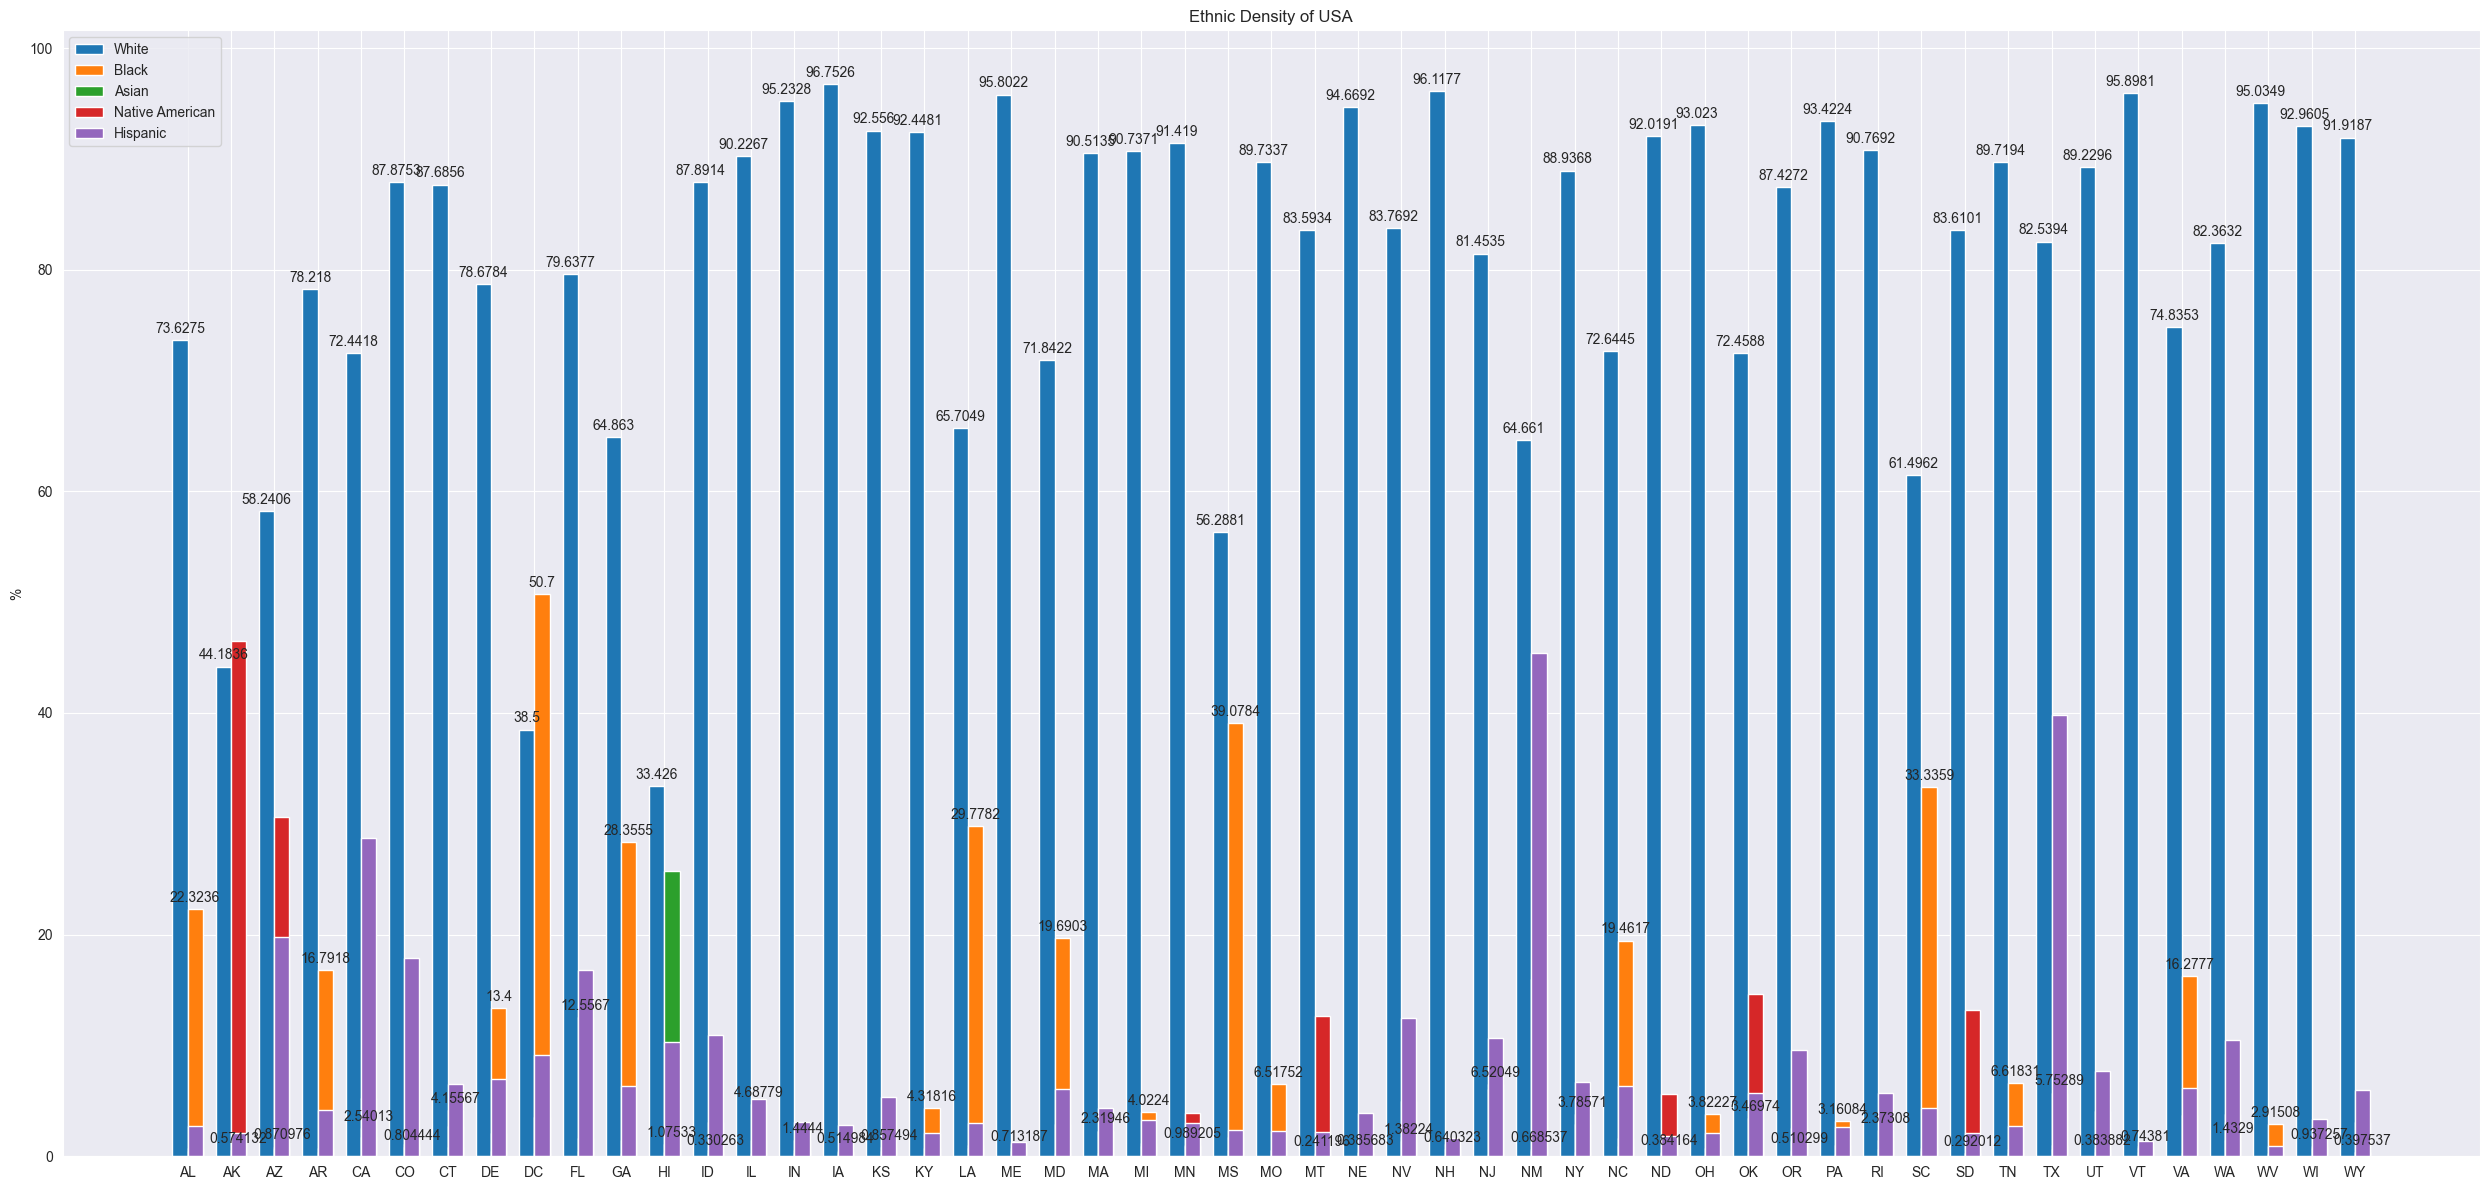

In [11]:

x = np.arange(len(df_state_popul.state))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize = (25, 12))
rects1 = ax.bar(x - width/2, df_state_popul.white, width, label='White')
rects2 = ax.bar(x + width/2, df_state_popul.black, width, label='Black')
rects3 = ax.bar(x + width/2, df_state_popul.asian, width, label='Asian')
rects4 = ax.bar(x + width/2, df_state_popul.native, width, label='Native American')
rects5 = ax.bar(x + width/2, df_state_popul.hispanic, width, label='Hispanic')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('Ethnic Density of USA')
ax.set_xticks(x, df_state_popul.state)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

# Create Donut Chart by of People Killed by Race


In [15]:
fatal_data = df_fatalities.race.value_counts()
fatal_data

W            1201
B             618
H             423
Undefined     223
A              39
N              31
Name: race, dtype: int64

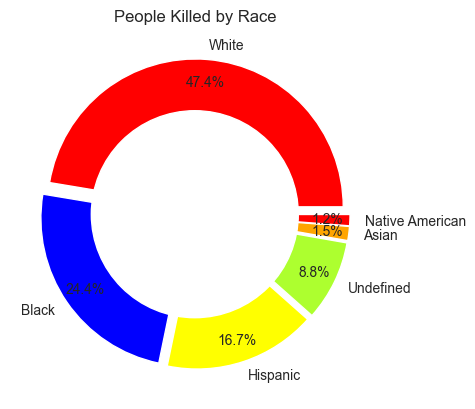

In [120]:
import matplotlib.pyplot as plt


# Setting size in Chart based on
# given values
sizes = fatal_data.values.tolist()

# Setting labels for items in Chart
labels = ['White', 'Black', 'Hispanic', 'Undefined', 'Asian', "Native American"]

# colors
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']

# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('People Killed by Race')


# Displaying Chart
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women


In [133]:
m_f = df_fatalities.gender.value_counts()
m_f

M    2428
F     107
Name: gender, dtype: int64

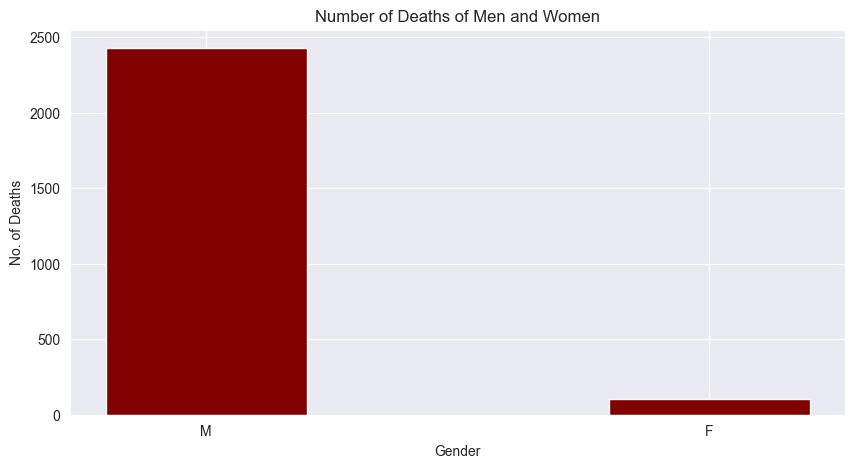

In [136]:
gend = m_f.index.tolist()
values = m_f.values.tolist()

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(gend, values, color ='maroon',
        width = 0.4)

plt.xlabel("Gender")
plt.ylabel("No. of Deaths")
plt.title("Number of Deaths of Men and Women")
plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

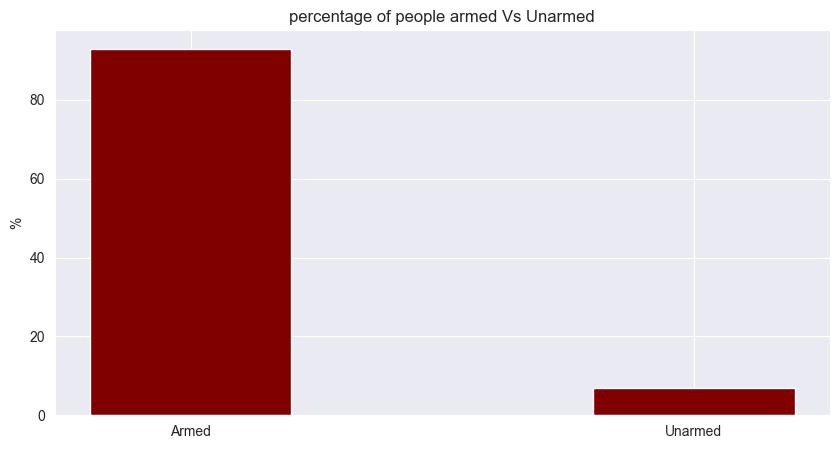

In [14]:
gend = ["Armed", "Unarmed"]
values = [93, 7]

figf = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(gend, values, color ='maroon',
        width = 0.4)


plt.ylabel("%")
plt.title("percentage of people armed Vs Unarmed")
plt.show()

In [34]:
weapon_count = []
weapon_X = []
for weapon in df_fatalities.armed.unique():
    if len(df_fatalities.armed[df_fatalities.armed == weapon]) > 10:
        weapon_count.append(len(df_fatalities.armed[df_fatalities.armed == weapon]))
        weapon_X.append(str(weapon))
    else:
        weapon_count.append(len(df_fatalities.armed[df_fatalities.armed == weapon]))
        weapon_X.append("Other")


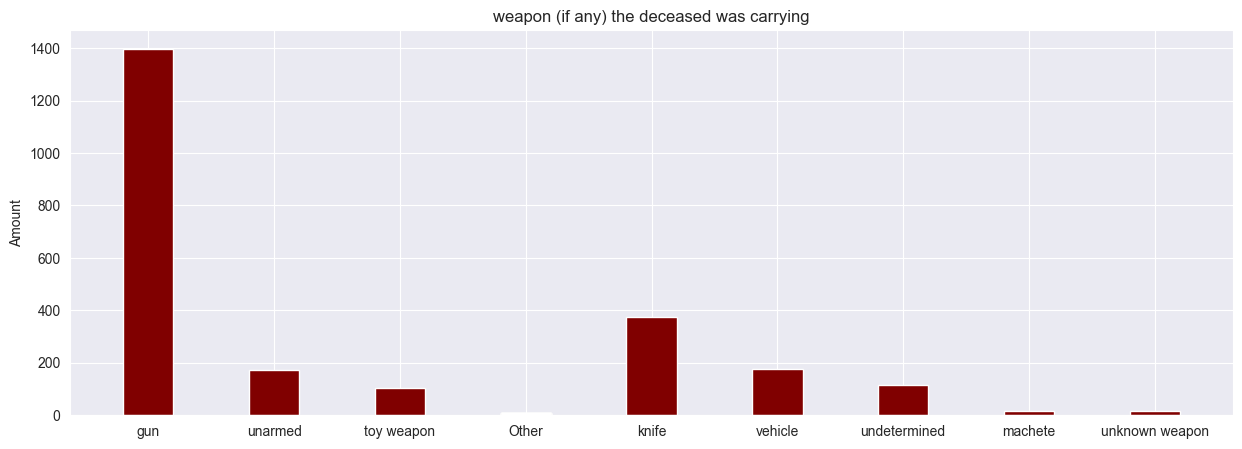

In [33]:
figf = plt.figure(figsize = (15, 5))

# creating the bar plot
plt.bar(weapon_X, weapon_count, color ='maroon',
        width = 0.4)

plt.title("weapon (if any) the deceased was carrying")
plt.ylabel("Amount")
plt.show()

# How Old Were the People Killed?

percentage of people killed who were under 25 years old.

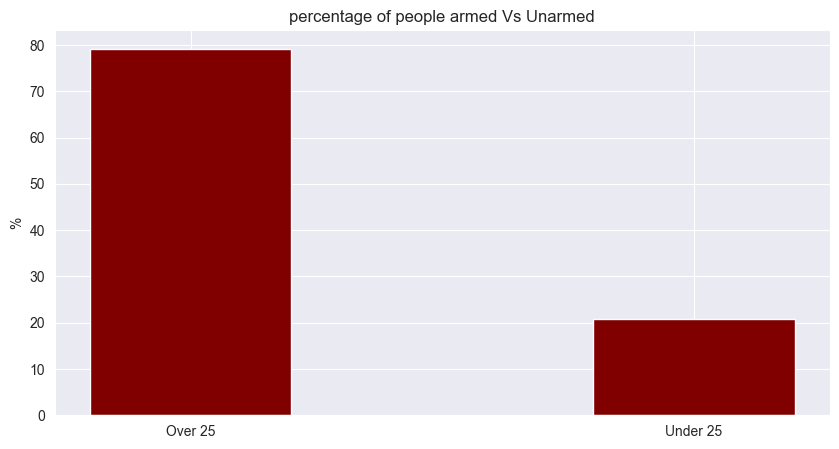

In [37]:

gend = ["Over 25", "Under 25"]
values = [100-(len(df_fatalities[df_fatalities.age < 25])/len(df_fatalities.age))*100, (len(df_fatalities[df_fatalities.age < 25])/len(df_fatalities.age))*100]

figfx = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(gend, values, color ='maroon',
        width = 0.4)


plt.ylabel("%")
plt.title("percentage of people armed Vs Unarmed")
plt.show()

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

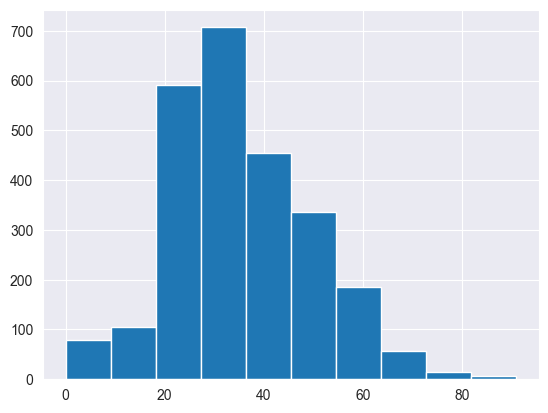

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1996\1353418176.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_fatalities.age, color='b', shade=True)


<AxesSubplot: xlabel='age', ylabel='Density'>

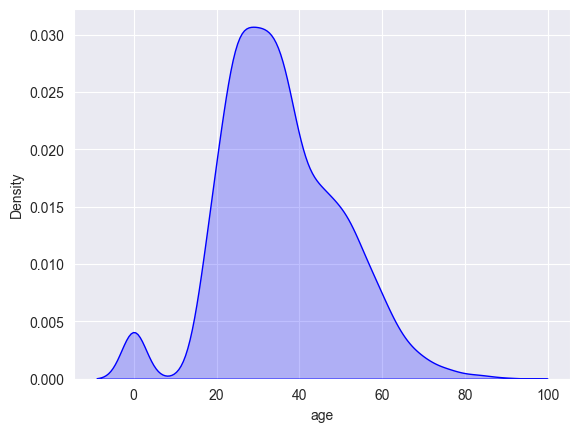

In [41]:
plt.hist(df_fatalities.age)
plt.show()
sns.kdeplot(df_fatalities.age, color='b', shade=True)

# Race of People Killed


In [55]:
rac = ["Asian", "White", "Hispanic", "Black", "Undefined", "Native American"]
rac_count = []
for race in df_fatalities.race.unique():
    rac_count.append(len(df_fatalities[df_fatalities.race == race]))

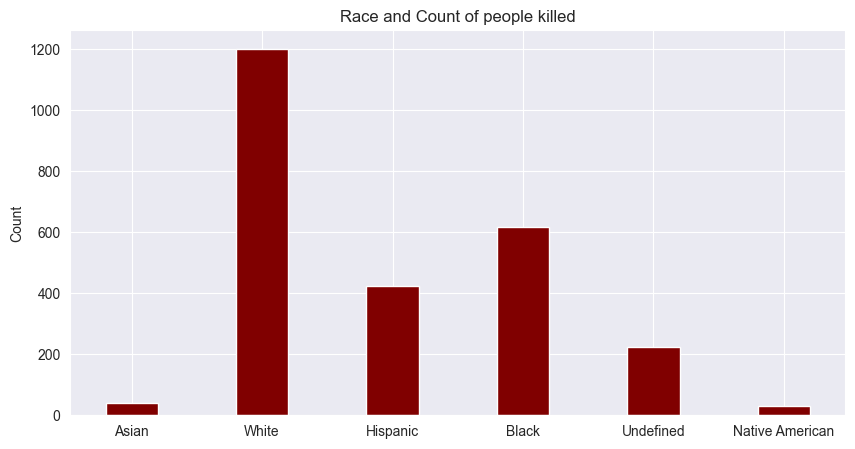

In [56]:
figfx = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(rac, rac_count, color ='maroon',
        width = 0.4)


plt.ylabel("Count")
plt.title("Race and Count of people killed")
plt.show()

# Mental Illness and Police Killings


In [60]:
ment_data = round((len(df_fatalities[df_fatalities.signs_of_mental_illness == True])/len(df_fatalities.signs_of_mental_illness))*100)
ment_data

25

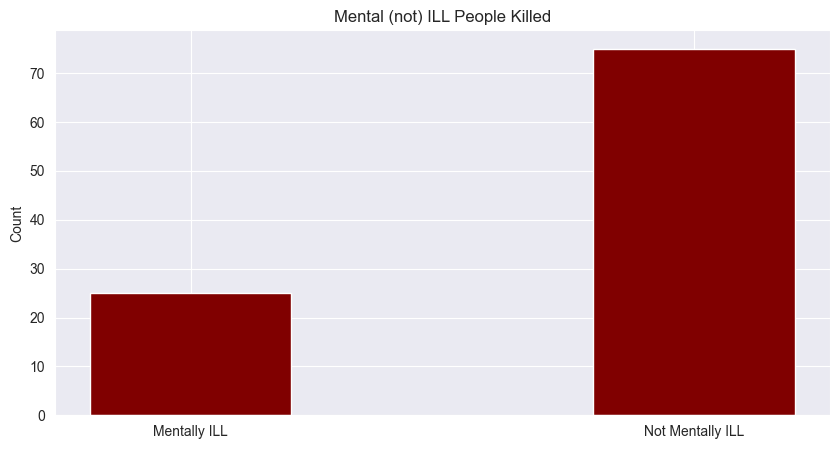

In [68]:
dfdg = [25, 75]
mnmj = ["Mentally ILL", "Not Mentally ILL"]
figfxf = plt.figure(figsize = (10, 5))

plt.bar(mnmj , dfdg, color ='maroon',
        width = 0.4)


plt.ylabel("Count")
plt.title("Mental (not) ILL People Killed")
plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?

In [6]:

crime_city_xd = df_fatalities.city.value_counts().head(10)


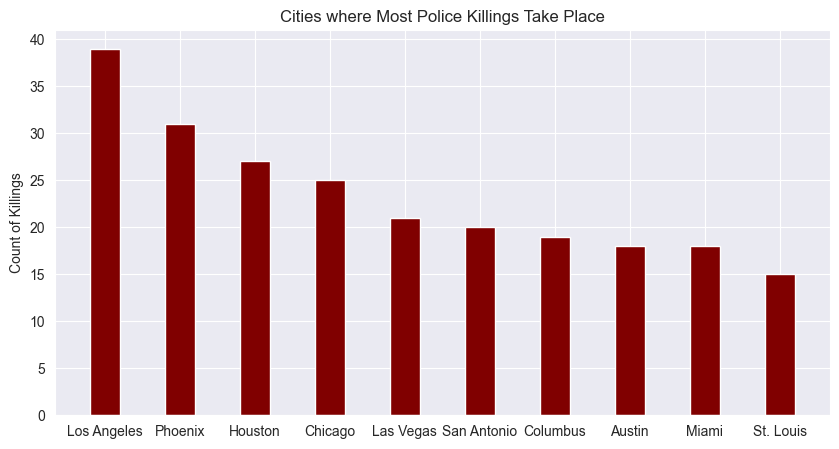

In [76]:
figfxfx = plt.figure(figsize = (10, 5))

plt.bar(crime_city_xd.index.tolist() , crime_city_xd.values.tolist(), color ='maroon',
        width = 0.4)


plt.ylabel("Count of Killings")
plt.title("Cities where Most Police Killings Take Place")
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [34]:
pop_city = []
whi_share = []
bla_share = []
nat_share = []
asi_share = []
his_share = []
unde_share = []
for city in crime_city_xd.index.tolist():
    pop_city.append(city)
    df_df_data = df_fatalities[df_fatalities.city == city]
    whi_share.append(round((len(df_df_data[df_df_data.race == "W"])/len(df_df_data))*100))
    bla_share.append(round((len(df_df_data[df_df_data.race == "B"])/len(df_df_data))*100))
    nat_share.append(round((len(df_df_data[df_df_data.race == "N"])/len(df_df_data))*100))
    asi_share.append(round((len(df_df_data[df_df_data.race == "A"])/len(df_df_data))*100))
    his_share.append(round((len(df_df_data[df_df_data.race == "H"])/len(df_df_data))*100))
    unde_share.append(round((len(df_df_data[df_df_data.race == "Undefined"])/len(df_df_data))*100))
popuc_data = {"city":pop_city, "white":whi_share, "black":bla_share, "native":nat_share, "asian": asi_share, "hispanic":his_share, "Undefined":unde_share}
df_state_popuxo = pd.DataFrame(data=popuc_data)
df_state_popuxo

,city,white,black,native,asian,hispanic,Undefined
0,Los Angeles,15,26,0,3,49,8
1,Phoenix,39,6,10,0,35,10
2,Houston,11,56,4,4,22,4
3,Chicago,8,84,0,0,4,4
4,Las Vegas,43,14,0,0,24,19
5,San Antonio,15,15,0,0,60,10
6,Columbus,32,58,0,0,0,11
7,Austin,72,17,0,0,11,0
8,Miami,17,44,0,0,33,6
9,St. Louis,20,73,0,0,0,7


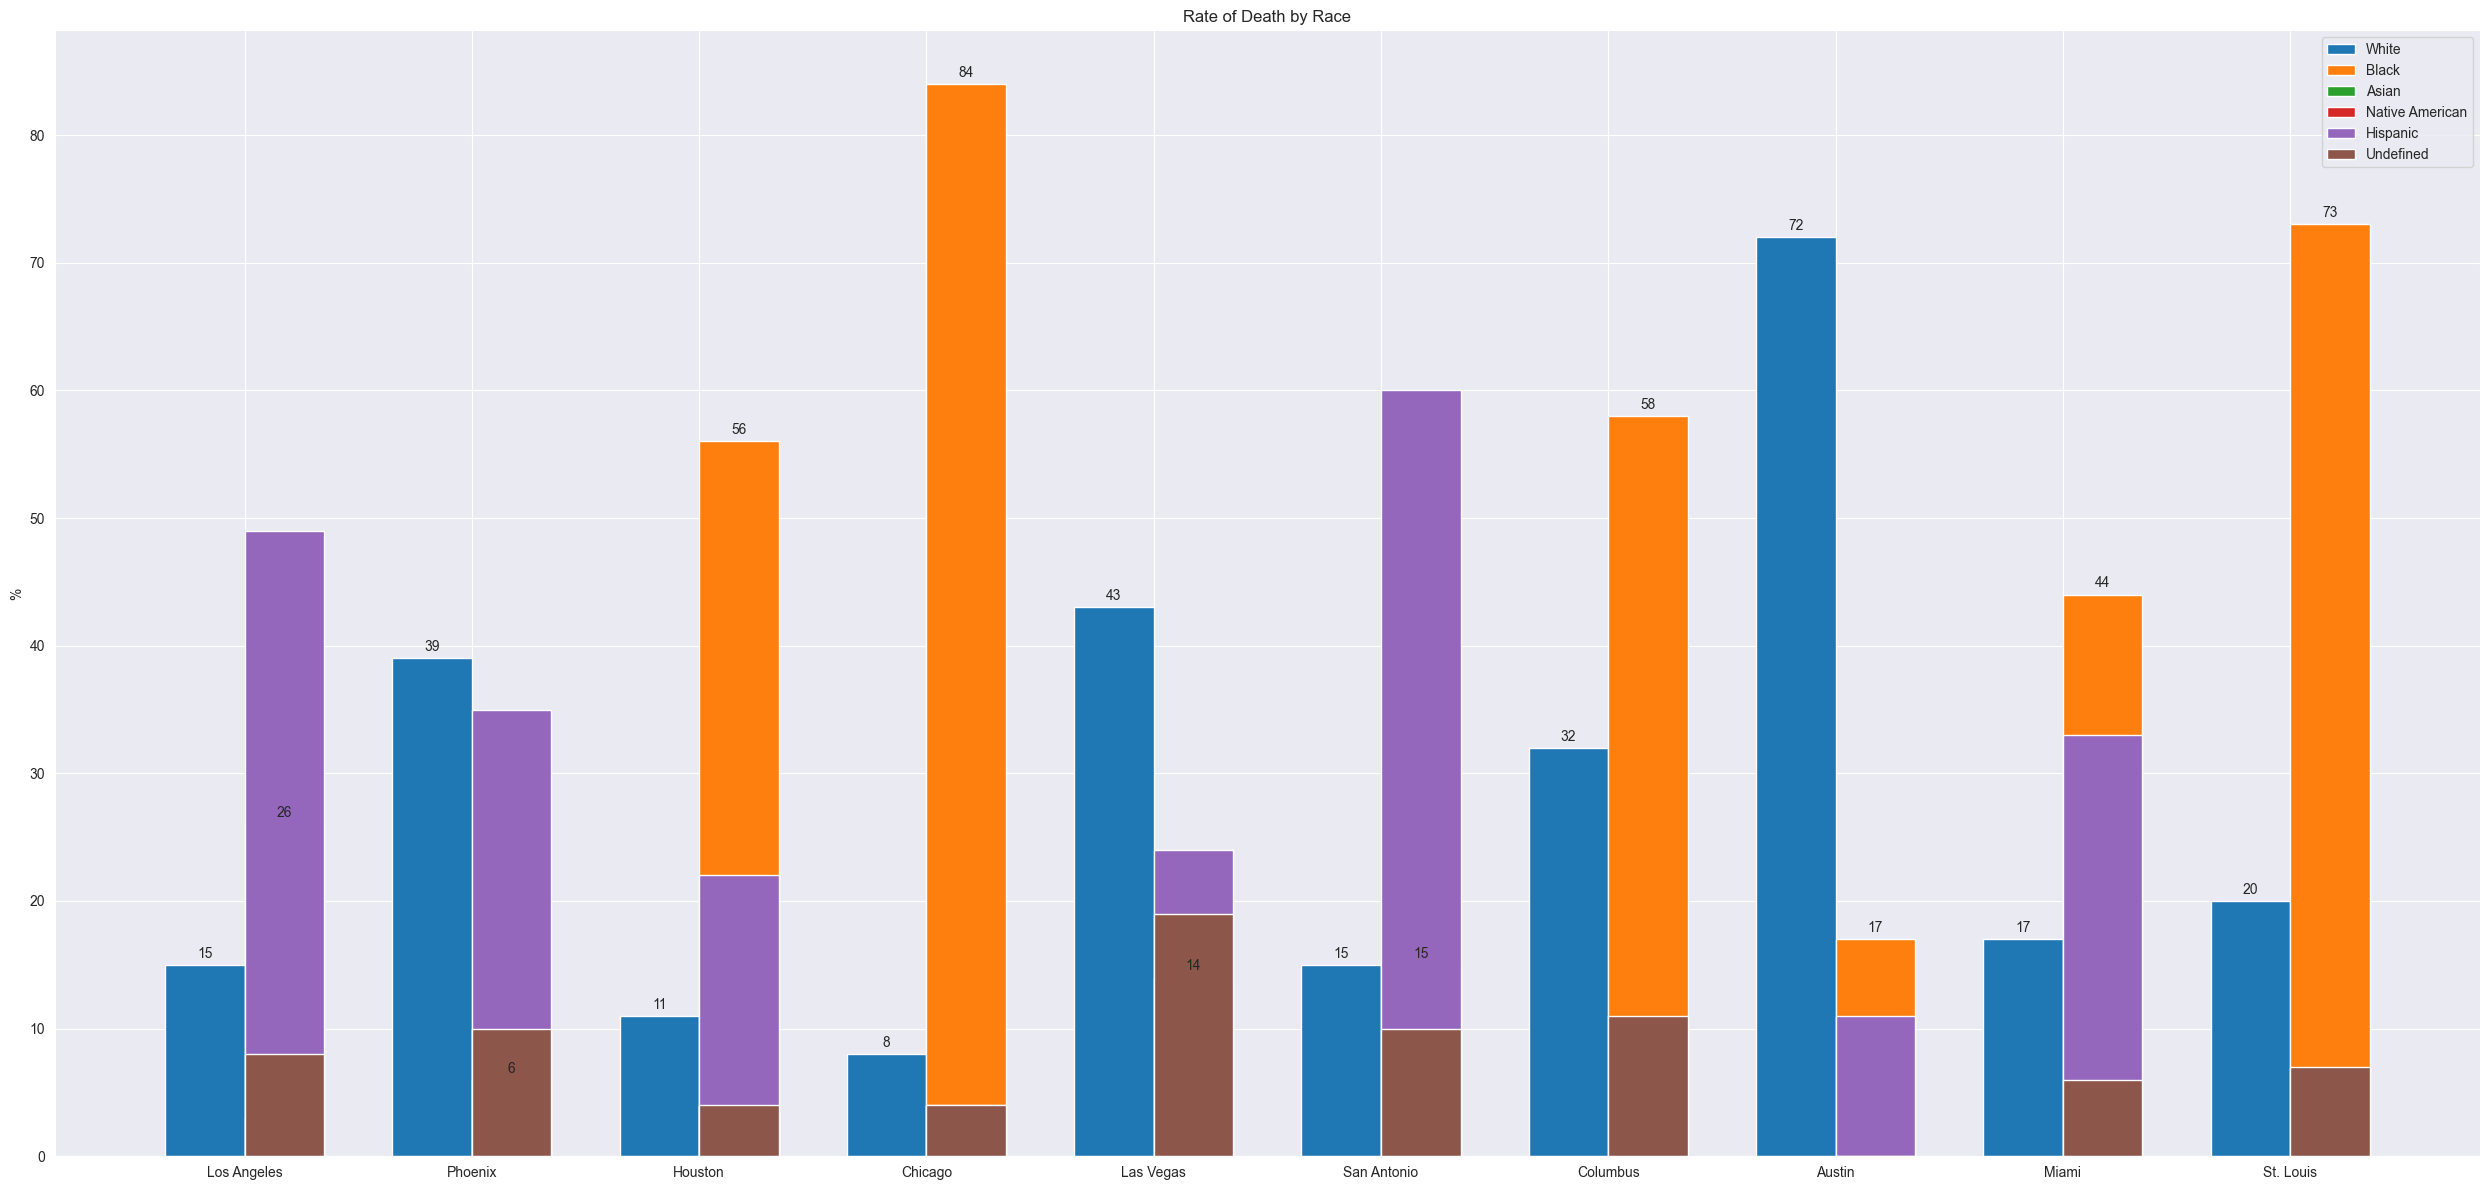

In [35]:
x = np.arange(len(df_state_popuxo.city))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize = (25, 12))
rects1 = ax.bar(x - width/2, df_state_popuxo.white, width, label='White')
rects2 = ax.bar(x + width/2, df_state_popuxo.black, width, label='Black')
rects3 = ax.bar(x + width/2, df_state_popuxo.asian, width, label='Asian')
rects4 = ax.bar(x + width/2, df_state_popuxo.native, width, label='Native American')
rects5 = ax.bar(x + width/2, df_state_popuxo.hispanic, width, label='Hispanic')
rects6 = ax.bar(x + width/2, df_state_popuxo.Undefined, width, label='Undefined')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('Rate of Death by Race')
ax.set_xticks(x, df_state_popuxo.city)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [42]:
state_out = []
state_w_k = []
for state in df_fatalities.state.unique():
    state_out.append(state)
    state_w_k.append(len(df_fatalities[df_fatalities.state == state]))
dat = {"State":state_out, "Fatality":state_w_k}
df_fatal_by_state = pd.DataFrame(data=dat)

In [43]:
fig = px.choropleth(df_fatal_by_state, locations="State", locationmode="USA-states", color="Fatality", scope="usa", )
fig.update_layout(
    title_text = 'Choropleth Map of Police Killings by US State',
    geo_scope='usa',
)
fig.show()

# Number of Police Killings Over Time


In [71]:
k_o_t = []
for date in df_fatalities.date.unique():
    k_o_t.append(len(df_fatalities[df_fatalities.date == date]))
ko_data = {"date":df_fatalities.date.unique(), "killings":k_o_t}
df_k_o = pd.DataFrame(data=ko_data)
df_k_o.date= pd.to_datetime(df_k_o.date)
df_k_o

,date,killings
0,2015-02-01,2
1,2015-03-01,1
2,2015-04-01,3
3,2015-05-01,1
4,2015-06-01,4
...,...,...
874,2017-07-26,4
875,2017-07-27,5
876,2017-07-28,3
877,2017-07-29,1


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).